# Statistics Advanced - 2| Assignment

##### 1. What is hypothesis testing in statistics?
- Hypothesis testing in statistics is a method of making decisions or inferences about a population based on sample data.

- It helps us check whether a claim (assumption) about a population parameter is likely to be true or not.

#### 2. What is the null hypothesis, and how does it differ from the alternative hypothesis?

- Null Hypothesis (H₀):

  - The default assumption or baseline claim.

  - States that there is no effect, no difference, or no relationship in the population.

  - It is what we try to disprove or reject.
 
- Alternative Hypothesis (H₁ or Ha):

    - The opposite of H₀ — what we want to test for.

    - Suggests there is an effect, a difference, or a relationship.

    - Supported if evidence from the data is strong enough to reject H₀.

#### 3. Explain the significance level in hypothesis testing and its role in deciding the outcome of a test.
- Significance Level (α):
      The significance level (α) is a threshold we set in hypothesis testing that tells us how much risk we are willing to take of rejecting the null hypothesis when it is actually true (Type I error).
  
#### Role in Hypothesis Testing:

1. Compare p-value with α:

- If p ≤ α → reject H₀ (evidence supports H₁).

- If p > α → fail to reject H₀ (not enough evidence to support H₁).

2. Defines the critical region:

- Based on α, we determine cutoff values (z-scores, t-scores, etc.) that separate "likely under H₀" from "unlikely under H₀."

3. Controls Type I Error:

- Smaller α (e.g., 0.01) → less chance of falsely rejecting H₀, but harder to detect real effects.

- Larger α (e.g., 0.10) → easier to reject H₀, but higher risk of false alarms.

#### 4. What are Type I and Type II errors? Give examples of each.


🔹 Type I Error (False Positive):

- Happens when we reject the null hypothesis (H₀) even though it is actually true.

- In other words: we think there is an effect/difference, but in reality, there isn’t.

- Probability of making this error = α (significance level).



🔹 Type II Error (False Negative):

- Happens when we fail to reject the null hypothesis (H₀) even though it is actually false.

- In other words: we miss a real effect/difference.

- Probability of making this error = β (related to test power = 1 – β).

#### 5: What is the difference between a Z-test and a T-test? Explain when to use each.

🔹 Z-test

- Used when the population variance (σ²) or standard deviation (σ) is known.

- Works well with large sample sizes (n > 30), because of the Central Limit Theorem.

- Test statistic follows the standard normal distribution (Z-distribution).

🔹 T-test

- Used when the population variance (σ²) is unknown.

- We estimate σ using the sample standard deviation (s).

- Works with small samples (n ≤ 30), but can also be used for larger samples.

- Test statistic follows the Student’s t-distribution, which has “fatter tails” than normal distribution to account for extra uncertainty.

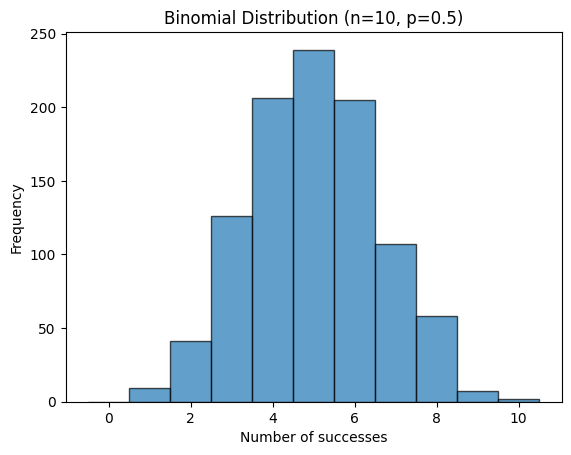

In [16]:
# 6. Write a Python program to generate a binomial distribution with n=10 and p=0.5, then plot its histogram.
# Hint: Generate random number using random function.
import numpy as np
import matplotlib.pyplot as plt

n = 10      
p = 0.5    
size = 1000 # number of random samples

# Generate binomial distribution
data = np.random.binomial(n, p, size)

# Plot histogram
plt.hist(data, bins=np.arange(-0.5, n+1.5, 1), edgecolor='black', alpha=0.7)
plt.title("Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Number of successes")
plt.ylabel("Frequency")
plt.show()


In [2]:
# 7 Implement hypothesis testing using Z-statistics for a sample dataset in Python. Show the Python code and interpret the results.
# sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
#               50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
#               50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
#               50.3, 50.4, 50.0, 49.7, 50.5, 49.9]
import numpy as np
from scipy import stats

# Sample data
sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
               50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
               50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
               50.3, 50.4, 50.0, 49.7, 50.5, 49.9]

mu_0 = 50  # Population mean (null hypothesis)

sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)  # sample standard deviation
n = len(sample_data)

z_stat = (sample_mean - mu_0) / (sample_std / np.sqrt(n))      # Z-statistic formula

p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))         # Two-tailed p-value

print("Sample Mean:", sample_mean)
print("Sample Std Dev:", sample_std)
print("Z-statistic:", z_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject H0: Significant evidence that mean ≠ 50")
else:
    print("Fail to Reject H0: No significant evidence that mean ≠ 50")


Sample Mean: 50.08888888888889
Sample Std Dev: 0.5365379910807955
Z-statistic: 0.9940271559503017
p-value: 0.3202096468890012
Fail to Reject H0: No significant evidence that mean ≠ 50


Sample Mean: 49.48076741302953
95% Confidence Interval: ( 48.579765818190495 , 50.38176900786857 )


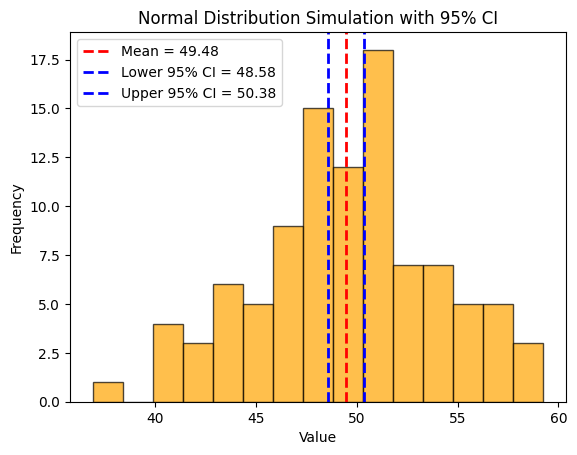

In [10]:
# 8. Write a Python script to simulate data from a normal distribution and calculate the 95% confidence interval for its mean. Plot the data using Matplotlib.

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Simulate data from a normal distribution
np.random.seed(42)   
mu, sigma = 50, 5    # true mean and standard deviation
n = 100              
data = np.random.normal(mu, sigma, n)

# Step 2: Calculate sample statistics
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # sample std deviation

# Step 3: Compute 95% confidence interval
alpha = 0.05
confidence = 1 - alpha
df = n - 1  # degrees of freedom

# t critical value
t_crit = stats.t.ppf(1 - alpha/2, df)

# margin of error
margin_error = t_crit * (sample_std / np.sqrt(n))

# confidence interval
ci_lower = sample_mean - margin_error
ci_upper = sample_mean + margin_error

print("Sample Mean:", sample_mean)
print("95% Confidence Interval: (", ci_lower, ",", ci_upper, ")")

plt.hist(data, bins=15, color='orange', edgecolor='black', alpha=0.7)
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {sample_mean:.2f}")
plt.axvline(ci_lower, color='blue', linestyle='dashed', linewidth=2, label=f"Lower 95% CI = {ci_lower:.2f}")
plt.axvline(ci_upper, color='blue', linestyle='dashed', linewidth=2, label=f"Upper 95% CI = {ci_upper:.2f}")
plt.title("Normal Distribution Simulation with 95% CI")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


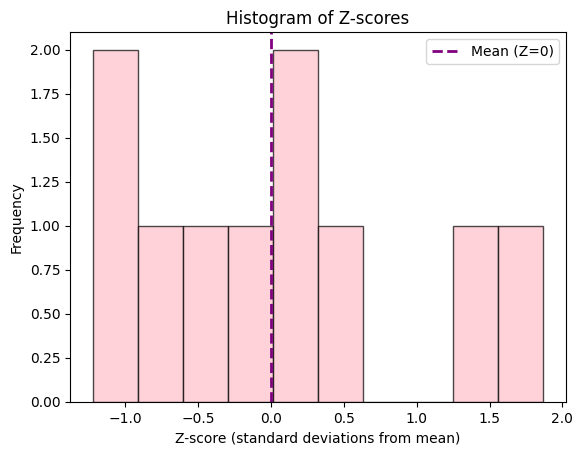

Z-scores: [np.float64(-1.2259546198522018), np.float64(-0.9782870198820599), np.float64(-0.854453219896989), np.float64(-0.6067856199268472), np.float64(-0.23528421997163454), np.float64(0.012383379998507266), np.float64(0.26005097996864907), np.float64(0.5077185799387909), np.float64(1.2507213798492163), np.float64(1.8698903797745707)]


In [25]:
# 9: Write a Python function to calculate the Z-scores from a dataset and visualize the standardized data using a histogram. Explain what the Z-scores represent
#in terms of standard deviations from the mean.

import numpy as np
import matplotlib.pyplot as plt

def calculate_z_scores(data):
    mean = np.mean(data)        # mean and std deviation
    std_dev = np.std(data, ddof=1)  # sample std
    
    # z-scores
    z_scores = [(x - mean) / std_dev for x in data]
    
    plt.hist(z_scores, bins=10, color='pink', edgecolor='black', alpha=0.7)
    plt.title("Histogram of Z-scores")
    plt.xlabel("Z-score (standard deviations from mean)")
    plt.ylabel("Frequency")
    plt.axvline(0, color='purple', linestyle='dashed', linewidth=2, label="Mean (Z=0)")
    plt.legend()
    plt.show()
    
    return z_scores


data = [10, 12, 13, 15, 18, 20, 22, 24, 30, 35]
z_scores = calculate_z_scores(data)
print("Z-scores:", z_scores)